### Laboratory Task 8: GLCM (Gray-Level Co-occurrence Matrix) Feature Extraction

### Install and Import Required Libraries

In [ ]:
#!pip install scikit-image

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color
from skimage.transform import resize
from skimage.feature import graycomatrix, graycoprops
from skimage.util import img_as_ubyte
from scipy.stats import entropy

### Load and Preprocess the Image

In [ ]:
img = io.imread('/content/chest_xray.jpeg', as_gray=True)
if len(img.shape) == 3:
    img_gray = color.rgb2gray(img)
else:
    img_gray = img

### Resize to 16x16 for fast GLCM analysis

In [ ]:
img_resized = resize(img_gray, (16, 16), anti_aliasing=True)
img_rescaled = img_as_ubyte(img_resized)  # convert to 8-bit integer

### Step 3: Compute GLCM Matrix

In [ ]:
distances = [1]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # 0°, 45°, 90°, 135°
glcm = graycomatrix(img_rescaled, distances=distances, angles=angles, symmetric=True, normed=True)

### Extract Features

In [ ]:
contrast = graycoprops(glcm, 'contrast')[0]
correlation = graycoprops(glcm, 'correlation')[0]
energy = graycoprops(glcm, 'energy')[0]
homogeneity = graycoprops(glcm, 'homogeneity')[0]

In [ ]:
# Custom function for entropy
def glcm_entropy(matrix):
    return [entropy(matrix[:, :, 0, i].ravel()) for i in range(4)]

In [ ]:
entropy_vals = glcm_entropy(glcm)

### Display Results

In [ ]:
angles_deg = ['0°', '45°', '90°', '135°']
print("GLCM Features (Distance = 1):\n")
for i in range(4):
    print(f"Angle {angles_deg[i]}:")
    print(f"  Contrast     : {contrast[i]:.4f}")
    print(f"  Correlation  : {correlation[i]:.4f}")
    print(f"  Energy (ASM) : {energy[i]:.4f}")
    print(f"  Homogeneity  : {homogeneity[i]:.4f}")
    print(f"  Entropy      : {entropy_vals[i]:.4f}\n")

GLCM Features (Distance = 1):

Angle 0°:
  Contrast     : 1078.2542
  Correlation  : 0.7865
  Energy (ASM) : 0.0494
  Homogeneity  : 0.0535
  Entropy      : 6.0647

Angle 45°:
  Contrast     : 1072.3333
  Correlation  : 0.7878
  Energy (ASM) : 0.0496
  Homogeneity  : 0.0517
  Entropy      : 6.0353

Angle 90°:
  Contrast     : 103.1625
  Correlation  : 0.9836
  Energy (ASM) : 0.0524
  Homogeneity  : 0.1444
  Entropy      : 5.9976

Angle 135°:
  Contrast     : 1248.2578
  Correlation  : 0.7545
  Energy (ASM) : 0.0487
  Homogeneity  : 0.0403
  Entropy      : 6.0630



(np.float64(-0.5), np.float64(1275.5), np.float64(916.5), np.float64(-0.5))

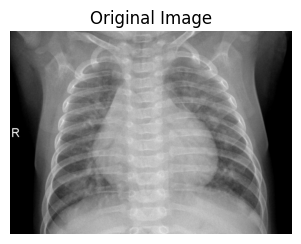

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

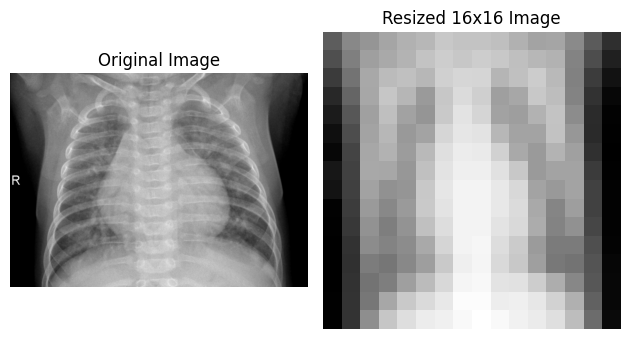

In [ ]:
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Resized 16x16 Image")
plt.imshow(img_rescaled, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### Display Extracted Features

In [ ]:
from skimage.feature import graycomatrix, graycoprops

# Convert image to uint8
image_uint8 = img_as_ubyte(img_rescaled)

# Compute GLCM
glcm = graycomatrix(image_uint8, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

# Extract features
contrast = graycoprops(glcm, 'contrast')[0, 0]
correlation = graycoprops(glcm, 'correlation')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

# Display
print("GLCM Texture Features:")
print(f"Contrast: {contrast}")
print(f"Correlation: {correlation}")
print(f"Energy: {energy}")
print(f"Homogeneity: {homogeneity}")


GLCM Texture Features:
Contrast: 1078.2541666666668
Correlation: 0.786548830990923
Energy: 0.04938862329637375
Homogeneity: 0.05351548438781155


### To visualize the GLCM matrix for 0°:

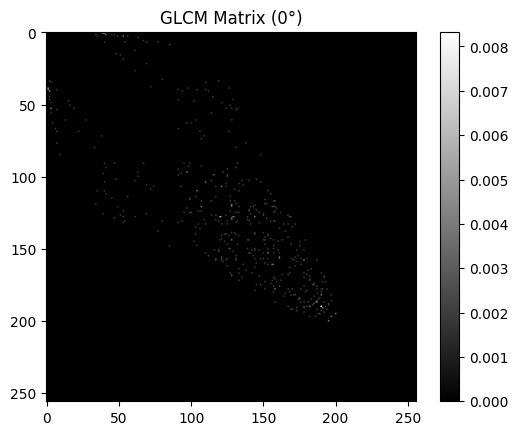

In [ ]:
plt.imshow(glcm[:, :, 0, 0], cmap='gray')
plt.title("GLCM Matrix (0°)")
plt.colorbar()
plt.show()
